In [111]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [112]:
df_BTC = pd.read_csv('final_BTCUSDT.csv')

In [113]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,2.244919e+07,0,1640991600000,1640995199999,BTC,USDT
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,2.077702e+07,0,1640988000000,1640991599999,BTC,USDT
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,4.482430e+07,0,1640984400000,1640987999999,BTC,USDT
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,4.588270e+07,0,1640980800000,1640984399999,BTC,USDT
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,7.803749e+07,0,1640977200000,1640980799999,BTC,USDT


In [114]:
df_BTC['open_time']

0        12/31/2021, 23:00:00
1        12/31/2021, 22:00:00
2        12/31/2021, 21:00:00
3        12/31/2021, 20:00:00
4        12/31/2021, 19:00:00
                 ...         
21269    01/01/2023, 04:00:00
21270    01/01/2023, 03:00:00
21271    01/01/2023, 02:00:00
21272    01/01/2023, 01:00:00
21273    01/01/2023, 00:00:00
Name: open_time, Length: 21274, dtype: object

In [115]:
df_BTC['datetime'] = df_BTC['close_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [116]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())
df_BTC['hour'] = df_BTC['datetime'].apply(lambda x: x.hour)

In [117]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week,hour
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,...,1640991600000,1640995199999,BTC,USDT,2021-12-31 23:59:59,2021,12,31,4,23
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,...,1640988000000,1640991599999,BTC,USDT,2021-12-31 22:59:59,2021,12,31,4,22
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,...,1640984400000,1640987999999,BTC,USDT,2021-12-31 21:59:59,2021,12,31,4,21
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,...,1640980800000,1640984399999,BTC,USDT,2021-12-31 20:59:59,2021,12,31,4,20
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,...,1640977200000,1640980799999,BTC,USDT,2021-12-31 19:59:59,2021,12,31,4,19


In [118]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
hour         

In [119]:
df_BTC = df_BTC.sort_values('datetime', ascending = True).reset_index()

In [120]:
df_BTC['change_close'] = - (df_BTC['close'].shift(1) - df_BTC['close'])

In [121]:
df_BTC.tail()

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week,hour,change_close
21269,17511,"06/06/2023, 19:00:00","06/06/2023, 19:59:59",26698.08,27216.89,26690.93,27080.13,6336.18815,1.708337e+08,104285,...,1686081599999,BTC,USDT,2023-06-06 19:59:59,2023,6,6,1,19,382.05
21270,17510,"06/06/2023, 20:00:00","06/06/2023, 20:59:59",27080.12,27222.00,26857.92,26944.98,5242.13695,1.416812e+08,94525,...,1686085199999,BTC,USDT,2023-06-06 20:59:59,2023,6,6,1,20,-135.15
21271,17509,"06/06/2023, 21:00:00","06/06/2023, 21:59:59",26944.99,27092.82,26938.06,27057.03,2014.79907,5.443146e+07,47340,...,1686088799999,BTC,USDT,2023-06-06 21:59:59,2023,6,6,1,21,112.05
21272,17508,"06/06/2023, 22:00:00","06/06/2023, 22:59:59",27057.03,27188.46,27044.34,27152.65,1842.84082,4.994595e+07,36436,...,1686092399999,BTC,USDT,2023-06-06 22:59:59,2023,6,6,1,22,95.62
21273,17507,"06/06/2023, 23:00:00","06/06/2023, 23:59:59",27152.66,27355.33,27120.02,27230.08,3752.27128,1.021350e+08,63295,...,1686095999999,BTC,USDT,2023-06-06 23:59:59,2023,6,6,1,23,77.43


In [122]:
df_BTC.shape

(21274, 24)

In [123]:
df_BTC = df_BTC.drop('ignore', axis =1)

In [124]:
df_BTC.tail()

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week,hour,change_close
21269,17511,"06/06/2023, 19:00:00","06/06/2023, 19:59:59",26698.08,27216.89,26690.93,27080.13,6336.18815,1.708337e+08,104285,...,1686081599999,BTC,USDT,2023-06-06 19:59:59,2023,6,6,1,19,382.05
21270,17510,"06/06/2023, 20:00:00","06/06/2023, 20:59:59",27080.12,27222.00,26857.92,26944.98,5242.13695,1.416812e+08,94525,...,1686085199999,BTC,USDT,2023-06-06 20:59:59,2023,6,6,1,20,-135.15
21271,17509,"06/06/2023, 21:00:00","06/06/2023, 21:59:59",26944.99,27092.82,26938.06,27057.03,2014.79907,5.443146e+07,47340,...,1686088799999,BTC,USDT,2023-06-06 21:59:59,2023,6,6,1,21,112.05
21272,17508,"06/06/2023, 22:00:00","06/06/2023, 22:59:59",27057.03,27188.46,27044.34,27152.65,1842.84082,4.994595e+07,36436,...,1686092399999,BTC,USDT,2023-06-06 22:59:59,2023,6,6,1,22,95.62
21273,17507,"06/06/2023, 23:00:00","06/06/2023, 23:59:59",27152.66,27355.33,27120.02,27230.08,3752.27128,1.021350e+08,63295,...,1686095999999,BTC,USDT,2023-06-06 23:59:59,2023,6,6,1,23,77.43


In [125]:
corr_matrix = df_BTC.corr()

In [52]:
# sn.heatmap(corr_matrix, annot=True)
# plt.show()

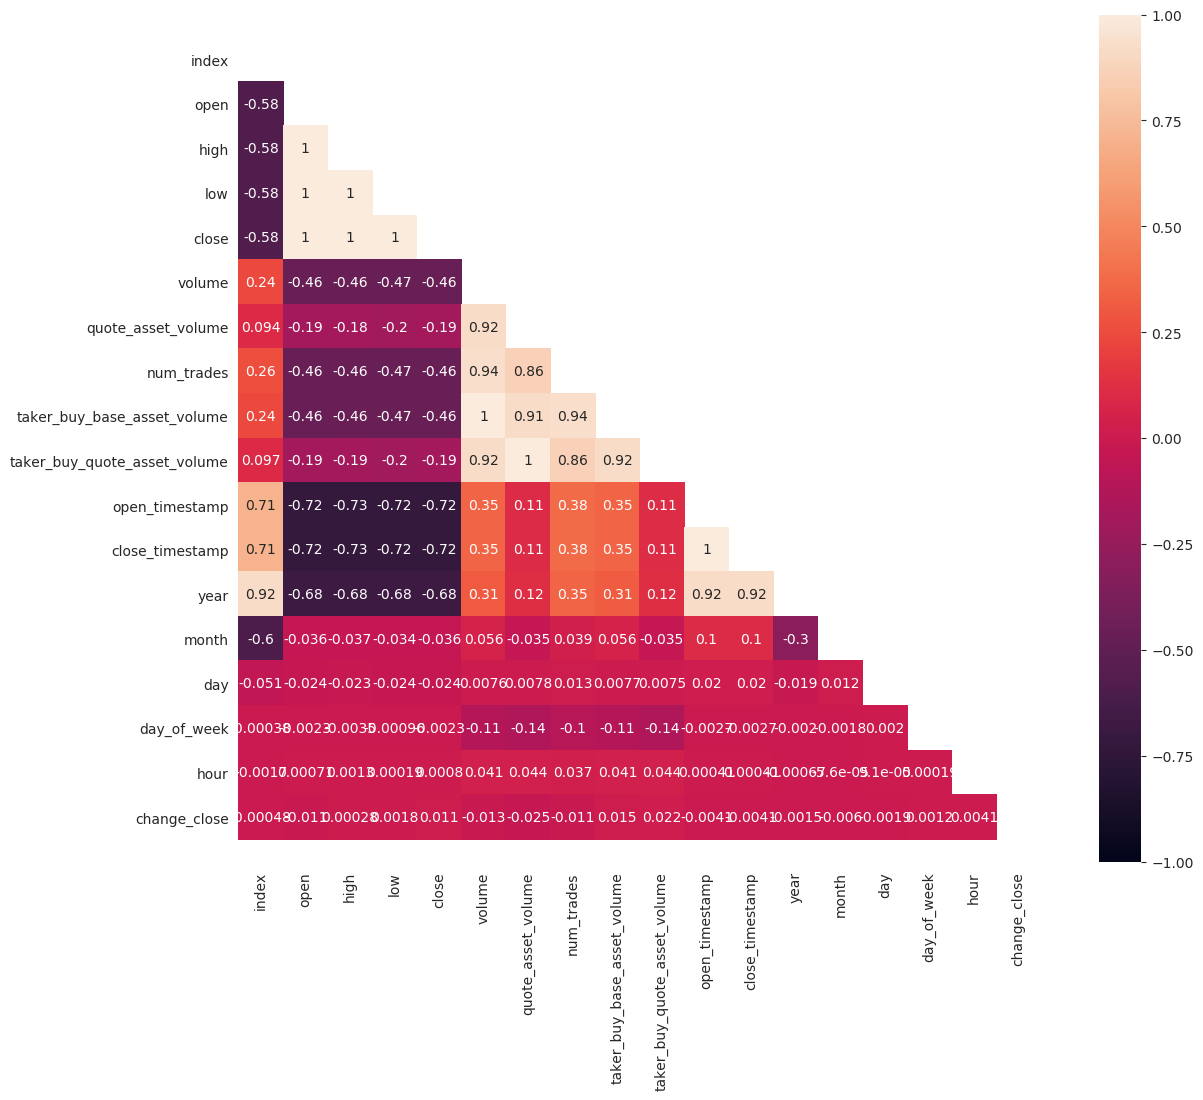

In [126]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 11))
    ax = sn.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

### Load Twitter data

In [127]:
df_tweet = pd.read_csv('BTC_tweets_cleaned.csv')

In [128]:
df_tweet.head()

,year,month,day,day_of_week,text,timestamp,sentiment
0,2023,6,1,3,555 unique drawn mutant primapes soon on netw...,2023-06-01T00:00:00Z,NEUTRAL
1,2023,6,1,3,bitcoin mining your path to digital fortune jo...,2023-06-01T00:00:00Z,NEUTRAL
2,2023,6,1,3,2 takip imize toplamda 1000 tl hediye ediyoru...,2023-06-01T00:00:00Z,NaN
3,2023,6,1,3,tether planeja minerar bitcoin no uruguaifique...,2023-06-01T00:00:00Z,NEUTRAL
4,2023,6,1,3,face screaming in fear hyped wl giveaway high...,2023-06-01T00:00:00Z,POSITIVE


In [129]:
pd.to_datetime(df_tweet.timestamp[0][:-1]).hour

0

In [130]:
df_tweet_senti = pd.get_dummies(df_tweet.sentiment, prefix='Sentiment')
# df_tweet_senti.shape
df_tweet = df_tweet.join(df_tweet_senti)
df_tweet['hour'] = df_tweet['timestamp'].apply(lambda x: pd.to_datetime(x[:-1]).hour)
df_tweet.shape


(1576, 12)

In [131]:
df_tweet_agg = df_tweet.groupby(['year','month','day']).agg({'Sentiment_NEGATIVE':'sum','Sentiment_NEUTRAL':'sum',
                                                            'Sentiment_POSITIVE':'sum'}).reset_index()

df_tweet_agg.head()

,year,month,day,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,2023,6,1,8,139,11
1,2023,6,2,4,144,11
2,2023,6,3,21,139,22
3,2023,6,4,25,156,27
4,2023,6,5,8,180,27


In [132]:
df_tweet_agg.shape

(7, 6)

In [134]:
df_joined = pd.merge(df_BTC, df_tweet_agg, how='inner', on=['year','month','day'])

df_joined.shape

(144, 26)

In [135]:
df_joined.head(2)

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,datetime,year,month,day,day_of_week,hour,change_close,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,17650,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,27065.77,2772.82443,7.541711e+07,57885,...,2023-06-01 00:59:59,2023,6,1,3,0,-144.58,8,139,11
1,17649,"06/01/2023, 01:00:00","06/01/2023, 01:59:59",27065.76,27165.47,27059.74,27078.56,1785.47203,4.842438e+07,30859,...,2023-06-01 01:59:59,2023,6,1,3,1,12.79,8,139,11


In [136]:
#filter for the days twitter data is avialable
# df_filter = df_joined[df_joined['datetime'] >= datetime.datetime(2023, 5, 20)]

In [137]:
# df_filter.dtypes

In [138]:
#Aggregating the dataframe by day to find out any correlation between the tweets and the prices 

df_hourly = df_joined.groupby(['day','month','year','day_of_week','hour']).agg({'open_time':'min',
                                                                         'close_time':'max',
                                                                         'open':'first',
                                                                         'high':'max',
                                                                         'low':'min',
                                                                         'close':'last',
                                                                         'volume':'sum',
                                                                         'num_trades':'sum',
                                                                         'open_timestamp':'min',
                                                                         'close_timestamp':'max',
                                                                         'datetime':'max',
                                                                         'Sentiment_NEGATIVE':'mean',
                                                                         'Sentiment_NEUTRAL':'mean',
                                                                         'Sentiment_POSITIVE':'mean'}).reset_index()


df_hourly['VolperTrade'] = df_hourly['volume']/df_hourly['num_trades']
df_hourly['change_close'] = - (df_hourly['close'].shift(1) - df_hourly['close'])
df_hourly.head()


,day,month,year,day_of_week,hour,open_time,close_time,open,high,low,...,volume,num_trades,open_timestamp,close_timestamp,datetime,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade,change_close
0,1,6,2023,3,0,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,...,2772.82443,57885,1685577600000,1685581199999,2023-06-01 00:59:59,8.0,139.0,11.0,0.047902,NaN
1,1,6,2023,3,1,"06/01/2023, 01:00:00","06/01/2023, 01:59:59",27065.76,27165.47,27059.74,...,1785.47203,30859,1685581200000,1685584799999,2023-06-01 01:59:59,8.0,139.0,11.0,0.057859,12.79
2,1,6,2023,3,2,"06/01/2023, 02:00:00","06/01/2023, 02:59:59",27078.56,27114.16,26640.00,...,3775.37874,66445,1685584800000,1685588399999,2023-06-01 02:59:59,8.0,139.0,11.0,0.056820,-359.30
3,1,6,2023,3,3,"06/01/2023, 03:00:00","06/01/2023, 03:59:59",26719.26,26838.89,26605.05,...,2879.51275,52426,1685588400000,1685591999999,2023-06-01 03:59:59,8.0,139.0,11.0,0.054925,60.68
4,1,6,2023,3,4,"06/01/2023, 04:00:00","06/01/2023, 04:59:59",26779.93,26822.81,26746.00,...,1223.77081,24654,1685592000000,1685595599999,2023-06-01 04:59:59,8.0,139.0,11.0,0.049638,24.21


In [139]:
df_hourly.columns

Index(['day', 'month', 'year', 'day_of_week', 'hour', 'open_time',
       'close_time', 'open', 'high', 'low', 'close', 'volume', 'num_trades',
       'open_timestamp', 'close_timestamp', 'datetime', 'Sentiment_NEGATIVE',
       'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade',
       'change_close'],
      dtype='object')

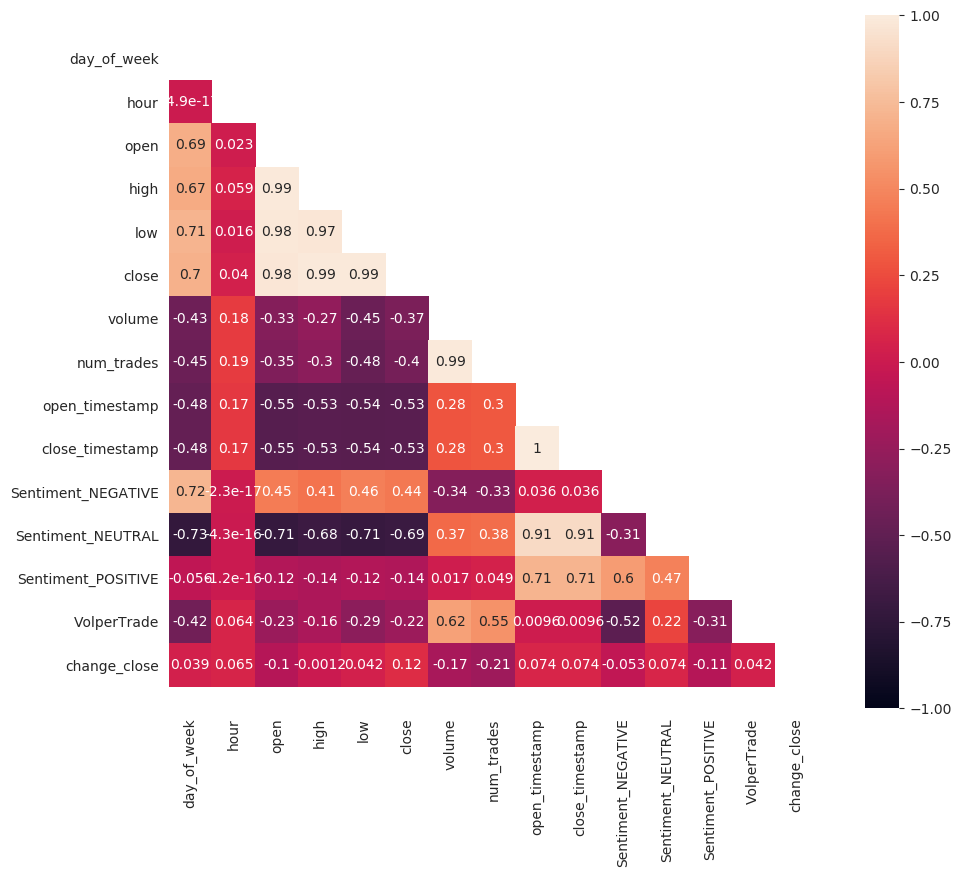

In [140]:
corr = df_hourly[['day_of_week', 'hour', 'open_time', 'close_time',
               'open', 'high', 'low', 'close', 'volume', 'num_trades',
               'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
               'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade', 'change_close']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sn.heatmap(corr, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

In [141]:
df_hourly.head()

,day,month,year,day_of_week,hour,open_time,close_time,open,high,low,...,volume,num_trades,open_timestamp,close_timestamp,datetime,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade,change_close
0,1,6,2023,3,0,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,...,2772.82443,57885,1685577600000,1685581199999,2023-06-01 00:59:59,8.0,139.0,11.0,0.047902,NaN
1,1,6,2023,3,1,"06/01/2023, 01:00:00","06/01/2023, 01:59:59",27065.76,27165.47,27059.74,...,1785.47203,30859,1685581200000,1685584799999,2023-06-01 01:59:59,8.0,139.0,11.0,0.057859,12.79
2,1,6,2023,3,2,"06/01/2023, 02:00:00","06/01/2023, 02:59:59",27078.56,27114.16,26640.00,...,3775.37874,66445,1685584800000,1685588399999,2023-06-01 02:59:59,8.0,139.0,11.0,0.056820,-359.30
3,1,6,2023,3,3,"06/01/2023, 03:00:00","06/01/2023, 03:59:59",26719.26,26838.89,26605.05,...,2879.51275,52426,1685588400000,1685591999999,2023-06-01 03:59:59,8.0,139.0,11.0,0.054925,60.68
4,1,6,2023,3,4,"06/01/2023, 04:00:00","06/01/2023, 04:59:59",26779.93,26822.81,26746.00,...,1223.77081,24654,1685592000000,1685595599999,2023-06-01 04:59:59,8.0,139.0,11.0,0.049638,24.21


In [142]:
### Plot

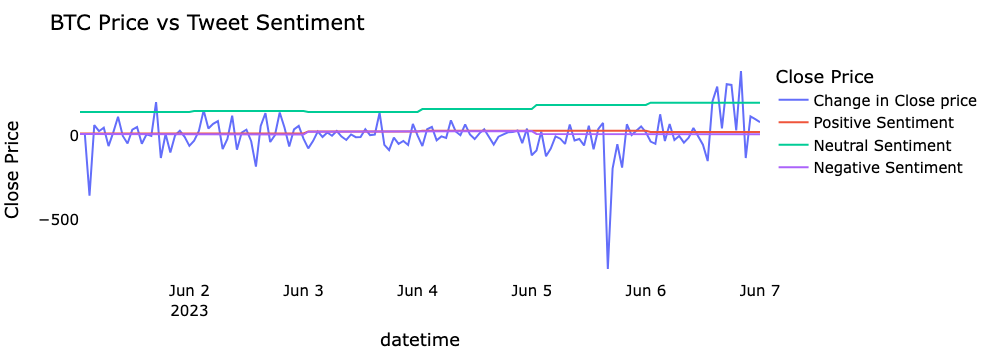

In [143]:
names = cycle(['Change in Close price', 'Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment'])

fig = px.line(df_hourly, x=df_hourly['datetime'], y=[df_hourly['change_close'], df_hourly['Sentiment_POSITIVE'], df_hourly['Sentiment_NEUTRAL'], df_hourly['Sentiment_NEGATIVE']],)
fig.update_layout(title_text='BTC Price vs Tweet Sentiment',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.update_layout(
    yaxis=dict(
        title='Close Price',
    )
)


fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

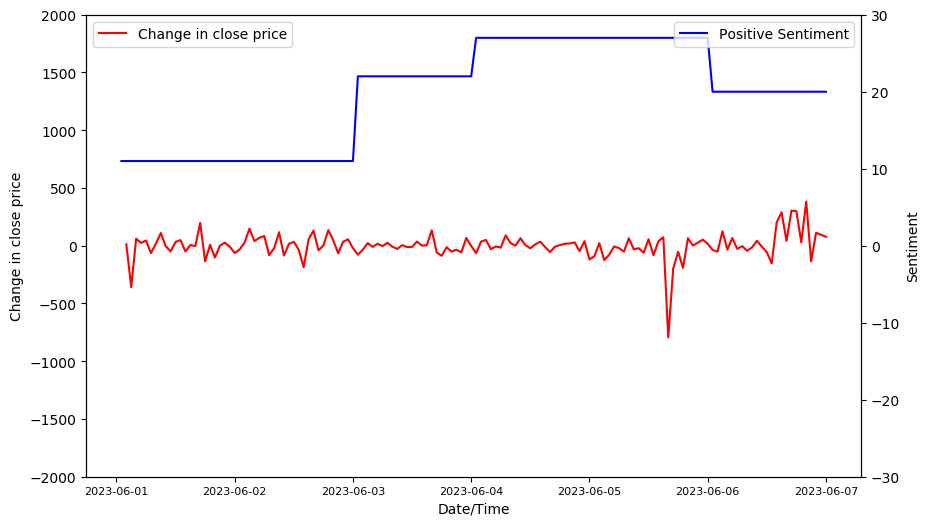

In [144]:
t = df_hourly ['datetime']
data1 = df_hourly['change_close']
data2 = df_hourly['Sentiment_POSITIVE']
data3 = df_hourly['Sentiment_NEUTRAL']
data4 = df_hourly['Sentiment_NEGATIVE']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Date/Time')
ax1.set_ylabel('Change in close price', color='black')
ax1.plot(t, data1, color='red')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim([-2000, 2000])


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
ax2.set_ylabel('Sentiment', color='black')  # we already handled the x-label with ax1
ax2.plot(t, data2, color='blue', label='Positive Sentiment')
# ax2.plot(t, data3, color='green', label='Neutral Sentiment')
# ax2.plot(t, data4, color='orange', label='Negative Sentiment')
ax2.set_ylim([-30, 30])
# ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(['Change in close price'], loc='upper left')
# ax2.legend(['Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment'], loc='upper right')
ax2.legend(['Positive Sentiment'], loc='upper right')


ax1.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='x', labelsize=8)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
